In [34]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
import ruptures as rpt
from scipy.signal import find_peaks



In [20]:
def convertDF(path): 
    '''converting a dataframe to a new datafrom with float, 5 decimal places and '''

    # reading in file, and skipping top row
    df = pd.read_csv(path, skiprows=1)

    # defining the titles of the rows
    body_loc = df.columns.tolist()

    # creating new empty dataframe
    df_new = pd.DataFrame()


    for part in body_loc:
        if part == 'bodyparts' or '.2' in part:
            continue
        else:
            df_new[part] = pd.to_numeric(df[part].iloc[1:], errors='coerce').dropna().round(5).astype(float)


    return df_new

In [21]:
def hand_PS_mov(t_hand_PS, hand_PS):
    '''reports the peaks and the troughs'''
    t_np = np.asarray(t_hand_PS)
    y_np = np.asarray(hand_PS)
    
    peaks, _ = find_peaks(y_np, distance=100)
    troughs, _ = find_peaks(-y_np, distance=100)

    t_peak = t_hand_PS[peaks]
    t_trough = t_hand_PS[troughs]

    return t_peak, t_trough, 'NA'

In [22]:
def arm_EF_mov(t_arm_EF, arm_EF):
    '''reports the peaks and troughs'''
    t_np = np.asarray(t_arm_EF)
    y_np = np.asarray(arm_EF)
    
    peaks, _ = find_peaks(y_np, distance=100)
    troughs, _ = find_peaks(-y_np, distance=100)

    t_peak = t_arm_EF[peaks]
    t_trough = t_arm_EF[troughs]

    return t_peak, t_trough, "NA"

In [23]:

def hand_OC_mov(df, t):
    '''Reports the peaks and troughs from the Euclidean distance'''

    start = t[0]
    stop = t[-1]

    fTip1y = df['fTip1.1']
    fTip2y = df['fTip2.1']

    # Element-wise subtraction: col1 - col2
    euc_dis_y = np.abs(fTip1y - fTip2y)

    start_idx = int(t[0])
    end_idx = int(t[-1]) + 1

    ed_y = euc_dis_y[start_idx:end_idx]
    t_np = np.arange(start_idx, end_idx)

    peaks, _ = find_peaks(ed_y, distance=100)
    troughs, _ = find_peaks(-ed_y, distance=100)

    # Filter out indices that are out of bounds
    peaks = peaks[peaks < len(t_np)]
    troughs = troughs[troughs < len(t_np)]

    t_peak = t_np[peaks]
    t_trough = t_np[troughs]

    return t_peak, t_trough, ed_y

In [24]:
def compute_peaks_troughs(row):
    if row['movement'] == 'hand_OC':
        dataset_key = row['dataset'] + ('f' if row['view'] == 'front' else 's')
        df = dataframes.get(dataset_key)
        return pd.Series(hand_OC_mov(df, row['time']))
    elif row['movement'] == 'hand_PS':
        return pd.Series(hand_PS_mov(row['time'], row['data']))
    elif row['movement'] == 'arm_EF':
        return pd.Series(arm_EF_mov(row['time'], row['data']))
    else:
        return pd.Series([None, None])  # default fallback

In [25]:
convertDF(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder\20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv')

,PalmBase,PalmBase.1,MCP1,MCP1.1,MCP2,MCP2.1,MCP3,MCP3.1,MCP4,MCP4.1,...,fTip4,fTip4.1,fTip5,fTip5.1,MidForeArm,MidForeArm.1,Elbow,Elbow.1,MidUpperArm,MidUpperArm.1
1,427.68420,525.04236,410.07465,512.46381,422.62207,512.34229,431.66183,515.87225,433.84598,521.71631,...,431.01334,524.16760,430.32056,533.31592,403.50226,498.96652,428.74121,521.85260,413.70947,508.22092
2,427.55515,525.52698,416.32242,519.02728,422.38318,512.05750,432.13925,515.85297,433.90189,523.97223,...,431.21808,523.53918,429.74142,533.03680,403.92142,498.57404,428.34988,521.21143,413.91519,508.15848
3,428.83749,525.09314,416.42743,514.66742,426.05865,513.35712,433.23996,515.40753,434.10300,520.83276,...,431.66458,523.39935,436.46527,533.51062,403.67477,499.32172,429.20349,521.05377,421.22336,511.42886
4,427.64291,525.92279,416.71466,518.57947,425.62653,513.52405,433.05511,515.44293,434.36728,523.24493,...,433.69006,510.82559,435.76471,533.62976,403.82156,498.84067,427.55899,520.01587,421.07886,510.67938
5,426.92892,527.05646,416.20743,519.60193,425.37756,513.96991,433.56567,515.88367,435.39407,524.12006,...,430.02274,524.09430,435.45032,534.02930,403.57819,499.19968,426.80386,521.10657,427.26505,519.75195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,409.27893,529.51117,402.01764,512.64917,419.35519,505.83731,433.84900,509.25037,442.25943,515.05127,...,437.06381,537.88745,437.47852,537.07068,399.36777,498.08112,404.47647,510.55844,404.61240,507.07516
4255,410.21484,528.43250,402.41074,512.63715,419.33099,505.77332,434.20978,508.96127,442.24612,514.95874,...,436.91302,537.72119,437.57880,536.73492,399.50476,497.88647,404.35373,510.64697,404.78781,507.02295
4256,409.49408,529.20630,402.52710,512.88135,419.25885,505.88922,433.54303,509.36148,441.58258,515.35126,...,471.11996,517.30737,436.38293,537.08301,399.65521,498.39529,404.72327,510.47168,413.33014,512.70062
4257,409.30777,529.09454,402.19760,512.87628,418.84924,506.24756,433.41946,509.68869,442.31934,515.36176,...,471.52716,517.42834,469.67038,520.89050,399.34567,498.01099,404.98578,510.48285,411.86682,519.94336


In [26]:
# defining my path to pt one
IO_03_09_2023_RSTN = Path(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder')

# list of all the videos for this specific patient (c1s is missing for this patient)
dbs_loc = ['b1f', 'b1s', 'b2f', 'b2s', 'b3f', 'b3s', 'c1f', 'c1s', 'c2s', 'c3f', 'c3s', 't1f', 't1s', 't2f', 't2s', 't3f', 't3s']

# place to store all the df
dataframes = {}

files = list(IO_03_09_2023_RSTN.iterdir())

# iterating over each file for pt 1 and converting the df to floats and cleaning up the data
for file, label in zip(IO_03_09_2023_RSTN.iterdir(), dbs_loc):
    dataframes[label] = convertDF(file)
    print(f"{label} loaded from {file.name}")


b1f loaded from 20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b1s loaded from 20230309_b1_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2f loaded from 20230309_b2_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2s loaded from 20230309_b2_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3f loaded from 20230309_b3_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3s loaded from 20230309_b3_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1f loaded from 20230309_c1_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1s loaded from 20230309_c2_d2p0_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c2s loaded from 20230309_c2_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c3f lo

In [27]:
import pandas as pd
import ruptures as rpt

# Initialize an empty dictionary to hold results by base label
results_dict = {}

for df_name, data in dataframes.items():
    # Extract base label (e.g. 'b1' from 'b1f' or 'b1s')
    base_label = df_name[:-1]  # remove last character
    view = 'front' if df_name.endswith('f') else 'side'

    points = data['MCP1.1']
    points_np = points.to_numpy()

    algo = rpt.Pelt(model='l2').fit(points_np)
    change_points = algo.predict(pen=1e6)

    # Initialize dict entry if not exists
    if base_label not in results_dict:
        results_dict[base_label] = {'front': None, 'side': None}

    # Save change points in proper column
    results_dict[base_label][view] = change_points

# Convert dictionary to DataFrame
df_indices = pd.DataFrame.from_dict(results_dict, orient='index').reset_index()
df_indices.rename(columns={'index': 'dataset'}, inplace=True)


In [28]:
df_indices['front_length'] = df_indices['front'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [29]:
df_indices

,dataset,front,side,front_length
0,b1,"[1745, 2515, 3210, 4010, 4258]","[725, 765, 1210, 1265, 2800, 3510, 4556]",5
1,b2,"[400, 1345, 2155, 2960, 3271]","[335, 1345, 2155, 2945, 2985, 3223]",5
2,b3,"[345, 1255, 2065, 2845, 3053]","[1200, 1960, 2750, 2790, 2947]",5
3,c1,"[690, 1480, 2280, 3465, 4595, 4635, 4936]","[500, 1300, 1975, 2720, 3013]",7
4,c2,None,"[495, 1375, 2160, 3219]",0
5,c3,"[565, 1365, 2325, 3105, 3368]","[570, 1365, 2370, 3268]",5
6,t1,[619],[622],1
7,t2,[498],"[340, 465, 522]",1
8,t3,"[305, 1320, 2175, 2400, 3110, 3575]","[1315, 2195, 2280, 3075, 3200, 3300, 3531]",6


In [30]:
success_list = []

for _, row in df_indices.iterrows():
    # Check if number of change points in 'front' view is 4, 5, or 6
    num_cp = len(row['front']) if isinstance(row['front'], list) else 0

    if num_cp in [4, 5, 6]:
        success_list.append(f"{row['dataset']}f")
    else:
        success_list.append(f"{row['dataset']}s")

print(success_list)


['b1f', 'b2f', 'b3f', 'c1s', 'c2s', 'c3f', 't1s', 't2s', 't3f']


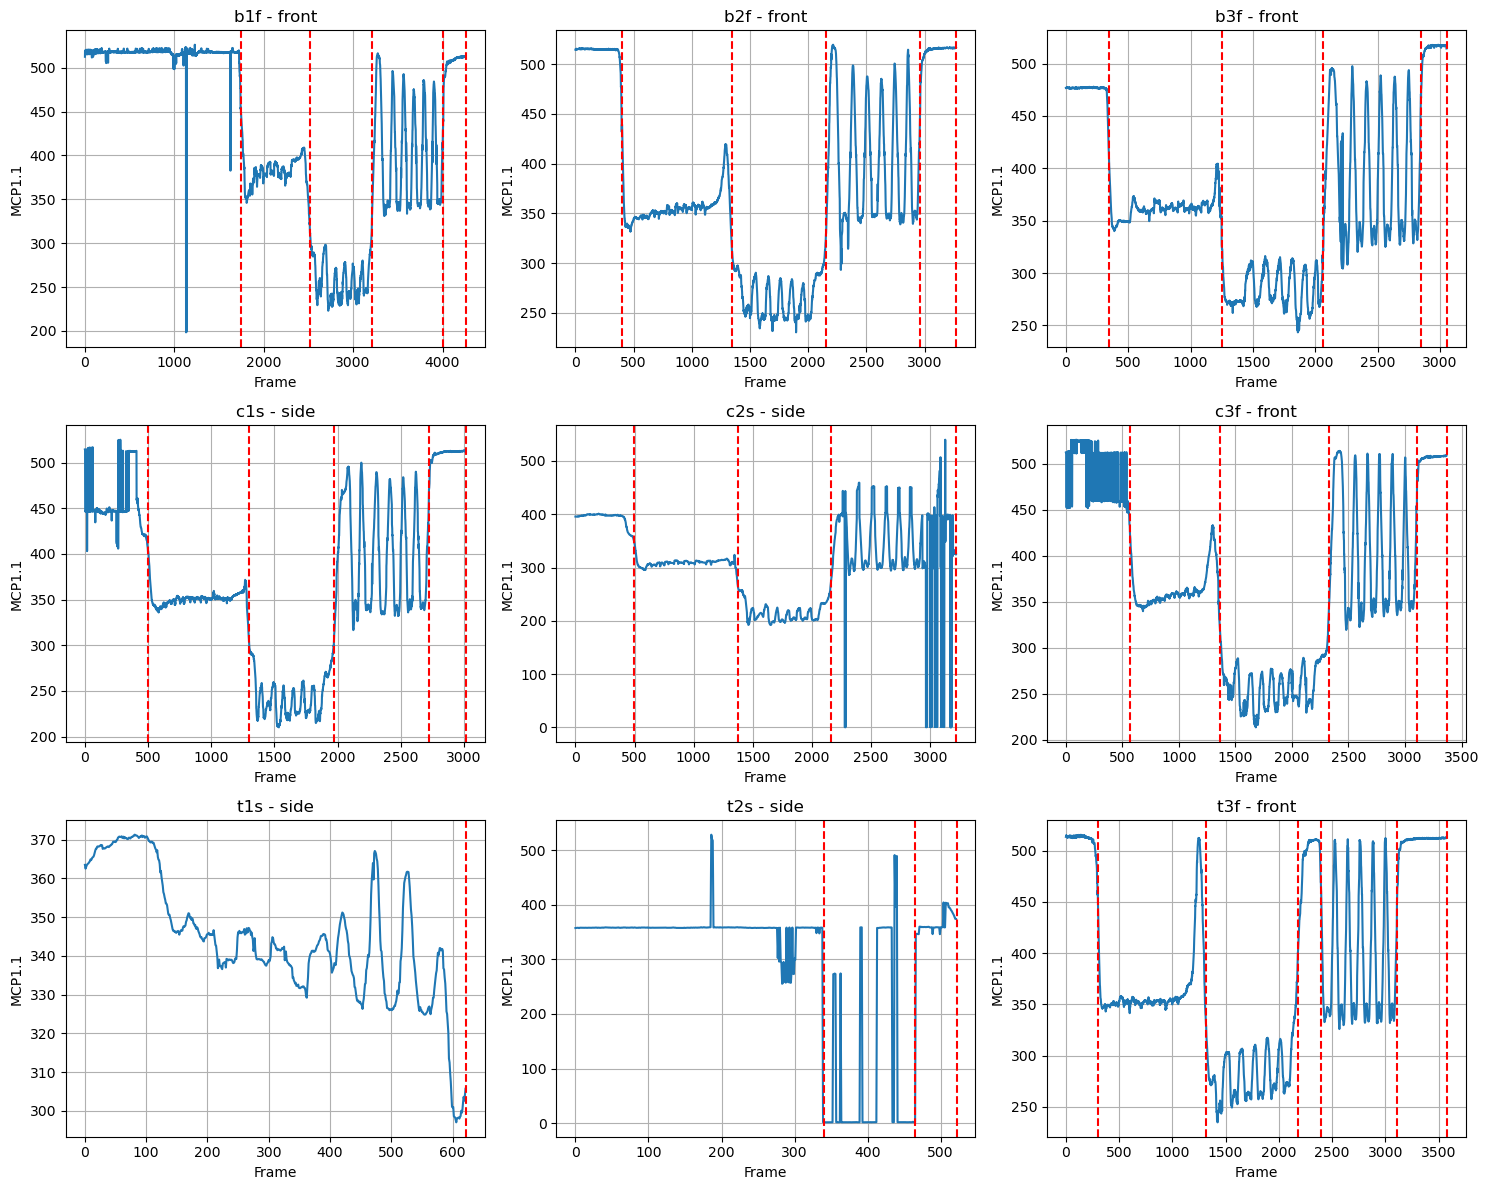

In [31]:
# Define number of plots per row
plots_per_row = 3
num_plots = len(success_list)
num_rows = int(np.ceil(num_plots / plots_per_row))

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten()  # Make it 1D so it's easier to index

for i, name in enumerate(success_list):
    base_name = name[:-1]
    view = 'front' if name.endswith('f') else 'side'

    # Get signal
    df = dataframes[name]
    signal = df['MCP1.1'].to_numpy()
    time = np.arange(len(signal))

    # Get change points
    row = df_indices[df_indices['dataset'] == base_name]
    change_points = row.iloc[0][view] if not row.empty else []

    # Plot in subplot
    ax = axes[i]
    ax.plot(time, signal, label='MCP1.1')
    for cp in change_points:
        ax.axvline(cp, color='red', linestyle='--')

    ax.set_title(f"{name} - {view}")
    ax.set_xlabel("Frame")
    ax.set_ylabel("MCP1.1")
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

In [32]:
# Create empty DataFrame to hold results
columns = ['dataset', 'view', 'movement', 'data', 'time', 'indices']
df_movements = pd.DataFrame(columns=columns)

for name in success_list:
    base_name = name[:-1]               # 'b1' from 'b1f'
    view = 'front' if name.endswith('f') else 'side'
    
    # 1. Get signal and time
    df = dataframes[name]
    x = df['MCP1.1'].to_numpy()
    t = df.index.to_numpy() if 'time' not in df else df['time'].to_numpy()

    # 2. Get change points
    row = df_indices[df_indices['dataset'] == base_name]
    if row.empty:
        continue  # skip if no match

    change_points = row.iloc[0][view]
    if len(change_points) < 3:
        continue  # not enough points to split into 3 parts

    # 3. Define movement segments
    segment_info = {
        'hand_OC': (change_points[0], change_points[1]),
        'hand_PS': (change_points[1], change_points[2]),
        'arm_EF': (change_points[2], len(x))  # to end
    }

    for movement, (start, end) in segment_info.items():
        if end - start < 400:
            continue  # skip short segments

        segment_data = x[start:end]
        segment_time = t[start:end]

        df_movements = pd.concat([
            df_movements,
            pd.DataFrame([{
                'dataset': base_name,
                'view': view,
                'movement': movement,
                'data': segment_data,
                'time': segment_time,
                'indices': (start, end)
            }])
        ], ignore_index=True)

# preview result
df_movements.head()


,dataset,view,movement,data,time,indices
0,b1,front,hand_OC,"[450.00656, 448.0502, 445.30121, 443.25018, 44...","[1746, 1747, 1748, 1749, 1750, 1751, 1752, 175...","(1745, 2515)"
1,b1,front,hand_PS,"[317.83844, 312.74094, 311.93942, 311.05396, 3...","[2516, 2517, 2518, 2519, 2520, 2521, 2522, 252...","(2515, 3210)"
2,b1,front,arm_EF,"[327.45755, 330.77271, 334.17511, 337.41238, 3...","[3211, 3212, 3213, 3214, 3215, 3216, 3217, 321...","(3210, 4258)"
3,b2,front,hand_OC,"[439.14294, 439.14536, 432.31442, 423.14078, 4...","[401, 402, 403, 404, 405, 406, 407, 408, 409, ...","(400, 1345)"
4,b2,front,hand_PS,"[311.82791, 312.01193, 310.13269, 306.78973, 3...","[1346, 1347, 1348, 1349, 1350, 1351, 1352, 135...","(1345, 2155)"


In [35]:
# Apply and create new columns
df_movements[['peaks', 'troughs', 'euclidean_dis']] = df_movements.apply(compute_peaks_troughs, axis=1)
df_movements

,dataset,view,movement,data,time,indices,peaks,troughs,euclidean_dis
0,b1,front,hand_OC,"[450.00656, 448.0502, 445.30121, 443.25018, 44...","[1746, 1747, 1748, 1749, 1750, 1751, 1752, 175...","(1745, 2515)","[1783, 1908, 2067, 2221, 2343, 2447]","[1751, 1942, 2086, 2271, 2372, 2472]",1747 0.99726 1748 2.07642 1749 1.6...
1,b1,front,hand_PS,"[317.83844, 312.74094, 311.93942, 311.05396, 3...","[2516, 2517, 2518, 2519, 2520, 2521, 2522, 252...","(2515, 3210)","[2520, 2693, 2809, 2912, 3099, 3199]","[2601, 2723, 2852, 3039, 3159]",NA
2,b1,front,arm_EF,"[327.45755, 330.77271, 334.17511, 337.41238, 3...","[3211, 3212, 3213, 3214, 3215, 3216, 3217, 321...","(3210, 4258)","[3276, 3442, 3566, 3680, 3789, 3905, 4045, 414...","[3232, 3347, 3499, 3604, 3749, 3862, 3974, 408...",NA
3,b2,front,hand_OC,"[439.14294, 439.14536, 432.31442, 423.14078, 4...","[401, 402, 403, 404, 405, 406, 407, 408, 409, ...","(400, 1345)","[411, 599, 699, 864, 1016, 1116, 1227, 1337]","[408, 510, 640, 759, 894, 1048, 1251]",402 0.52353 403 33.69629 404 34.4...
4,b2,front,hand_PS,"[311.82791, 312.01193, 310.13269, 306.78973, 3...","[1346, 1347, 1348, 1349, 1350, 1351, 1352, 135...","(1345, 2155)","[1347, 1447, 1551, 1659, 1762, 1863, 2046, 2146]","[1360, 1460, 1585, 1695, 1795, 1897, 2007, 2108]",NA
5,b2,front,arm_EF,"[335.06079, 339.45883, 342.71967, 346.3273, 34...","[2156, 2157, 2158, 2159, 2160, 2161, 2162, 216...","(2155, 3271)","[2215, 2385, 2507, 2630, 2743, 2859, 3022, 312...","[2173, 2282, 2451, 2572, 2676, 2792, 2901, 300...",NA
6,b3,front,hand_OC,"[409.40518, 406.11288, 402.24872, 400.51428, 3...","[346, 347, 348, 349, 350, 351, 352, 353, 354, ...","(345, 1255)","[376, 485, 586, 715, 847, 1008, 1120, 1233]","[347, 458, 562, 676, 778, 879, 1066, 1229]",347 9.99869 348 4.23419 349 6.6...
7,b3,front,hand_PS,"[312.09073, 310.85718, 309.12454, 307.09369, 3...","[1256, 1257, 1258, 1259, 1260, 1261, 1262, 126...","(1255, 2065)","[1261, 1364, 1485, 1599, 1718, 1820, 1923, 2063]","[1339, 1530, 1649, 1751, 1861, 1962, 2064]",NA
8,b3,front,arm_EF,"[328.60373, 343.32758, 352.04663, 350.80725, 3...","[2066, 2067, 2068, 2069, 2070, 2071, 2072, 207...","(2065, 3053)","[2135, 2298, 2412, 2525, 2638, 2751, 2885, 2986]","[2069, 2222, 2340, 2459, 2563, 2681, 2787, 288...",NA
9,c1,side,hand_OC,"[403.45663, 402.40698, 400.61636, 400.27429, 3...","[501, 502, 503, 504, 505, 506, 507, 508, 509, ...","(500, 1300)","[518, 636, 749, 849, 950, 1110, 1242]","[502, 682, 874, 1005, 1124, 1281]",502 4.45868 503 4.25412 504 5.9...


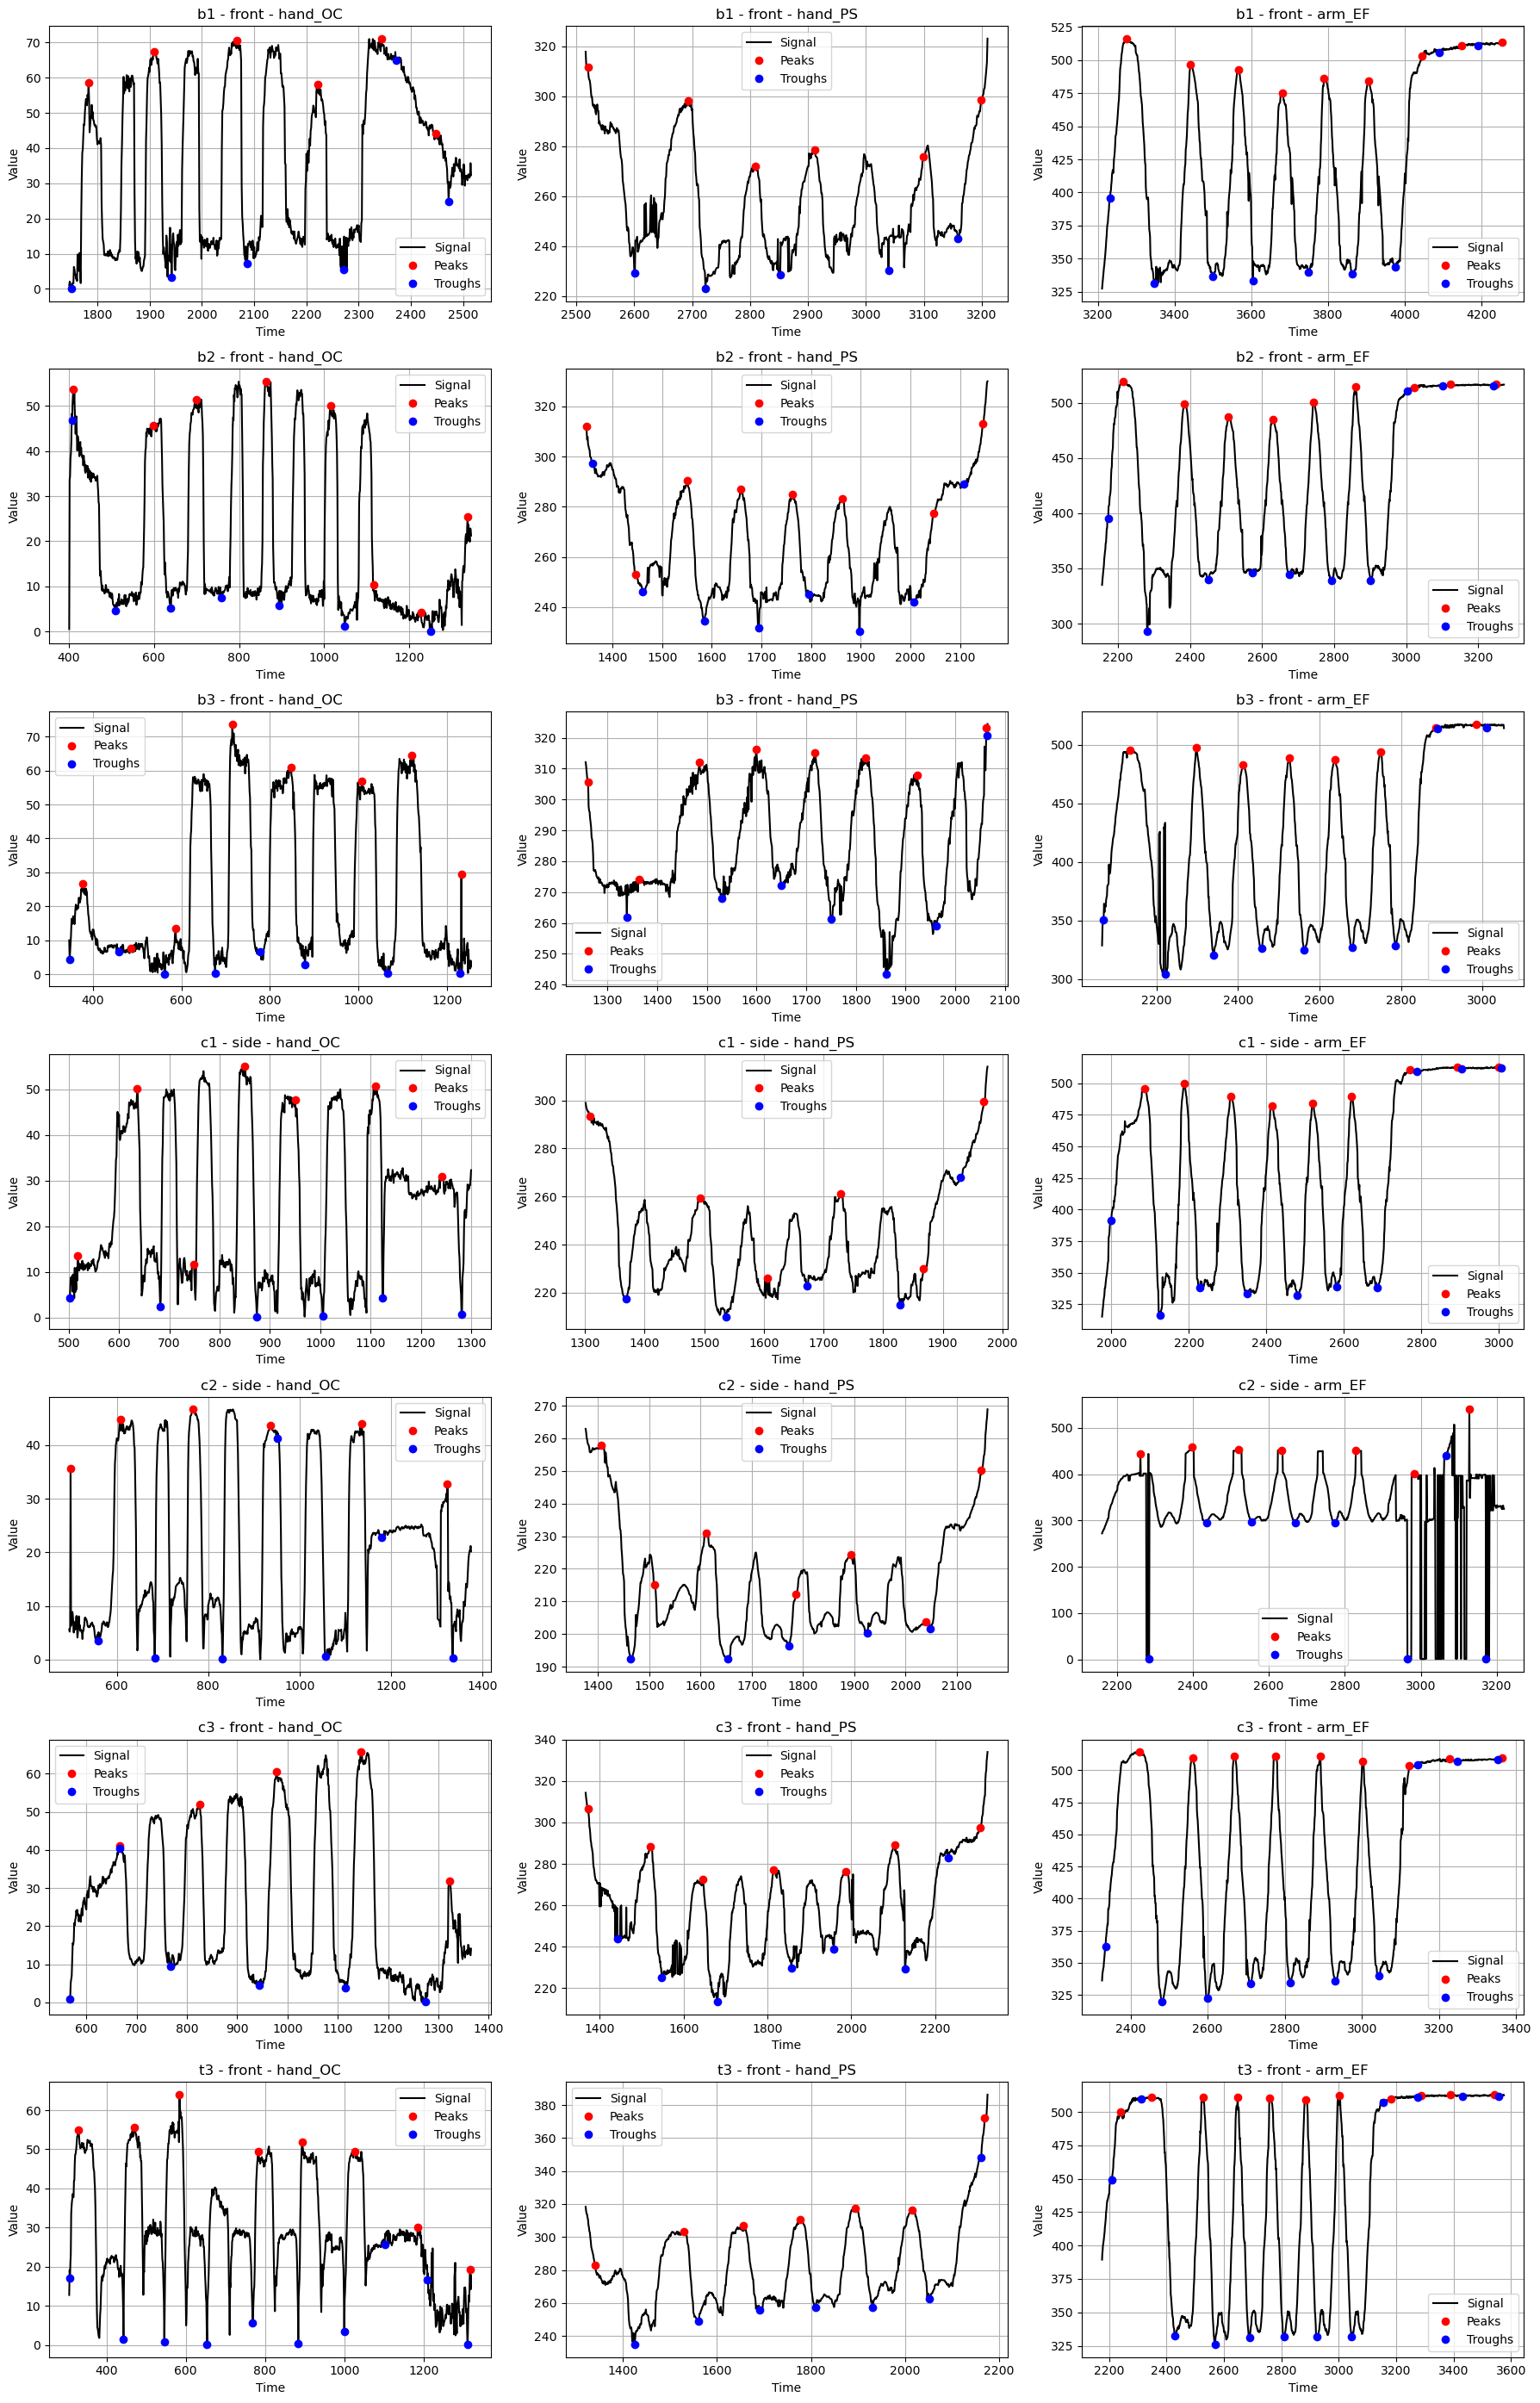

In [36]:
# Set up figure layout
num_plots = len(df_movements)
cols = 3
rows = (num_plots + cols - 1) // cols  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()  # Make it easier to index

for i, (idx, row) in enumerate(df_movements.iterrows()):
    ax = axes[i]

    if row['movement'] == 'hand_OC':
        data = row['euclidean_dis']
    else:
        data = row['data']
    
    # Plot time vs data
    ax.plot(row['time'], data, label='Signal', color='black')

    # Plot peaks (if any)
    if isinstance(row['peaks'], (np.ndarray, list)):
        ax.plot(row['peaks'], np.interp(row['peaks'], row['time'], data), 'ro', label='Peaks')

    # Plot troughs (if any)
    if isinstance(row['troughs'], (np.ndarray, list)):
        ax.plot(row['troughs'], np.interp(row['troughs'], row['time'], data), 'bo', label='Troughs')

    # Add titles and labels
    ax.set_title(f"{row['dataset']} - {row['view']} - {row['movement']}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.grid(True)
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
